<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales

# Tarea Semanal Nº10
#### Tobías Guerrero

## 1. Introducción

En esta tarea semanal, se propone realizar un filtrado no lineal de la señal de ECG ya filtrada de forma lineal en la tarea semanal anterior, para así remover la interferencia de línea de base.

Para esto, se seguirá el punto 5 del [TP4](https://github.com/marianux/tps_pds/blob/master/TP4%20-%20Filtrado.ipynb).


## 2. Resolución

### 2.1 Obtención y visualización de la señal

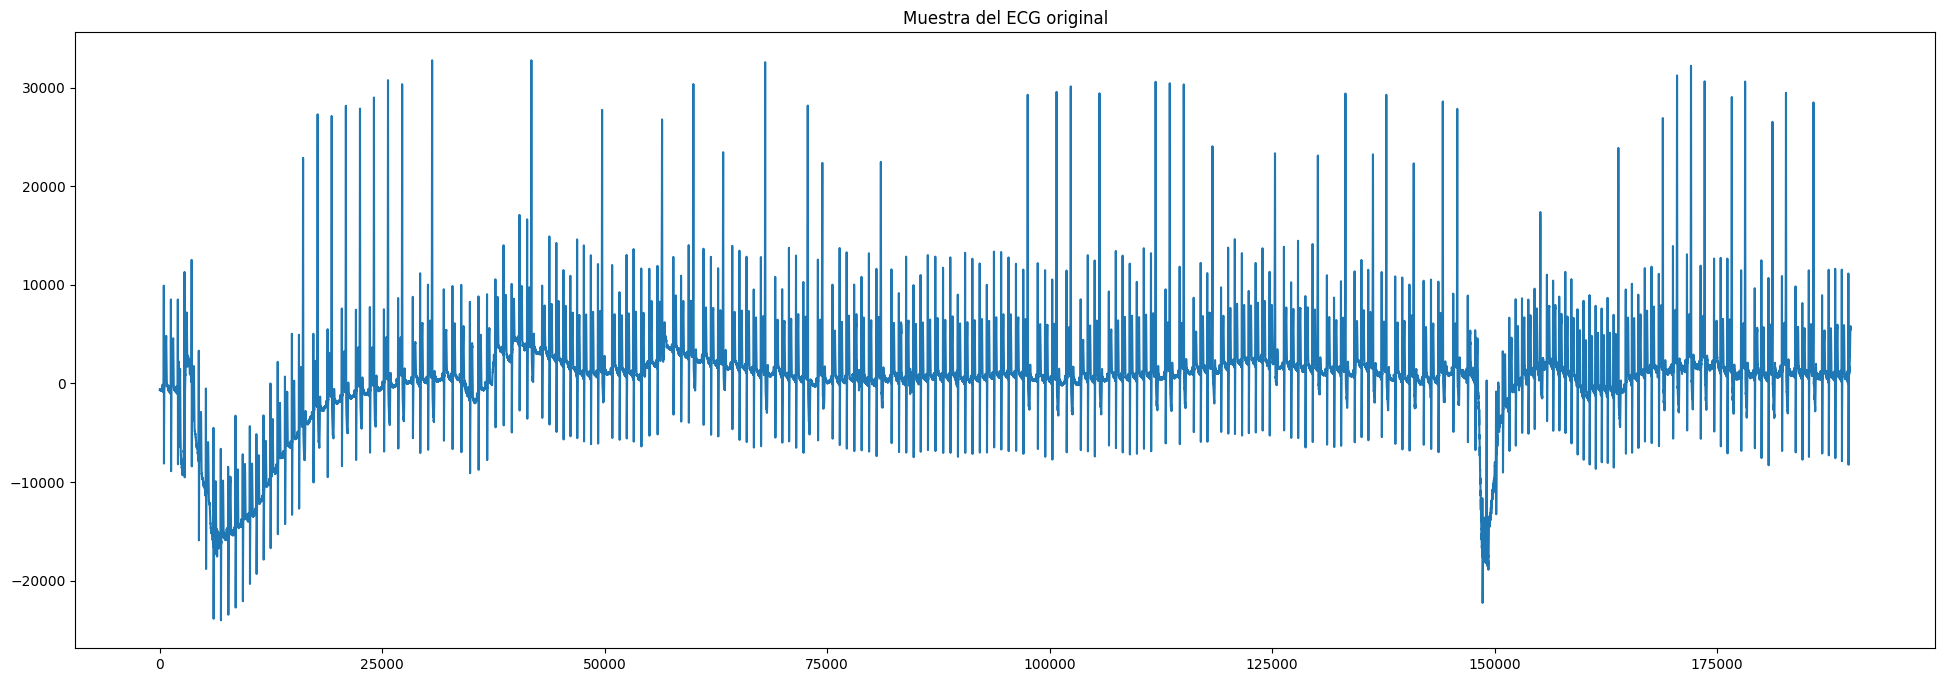

In [1]:
#import scipy as sp
#from scipy.interpolate import CubicSpline
#import numpy as np
#import matplotlib.pyplot as plt

#mat_struct = sp.io.loadmat('ecg.mat')
#ecg_one_lead = mat_struct["ecg_lead"]
#fs_ecg = 1000  # Hz
#nyq = fs_ecg / 2

#ecg_muestra = ecg_one_lead[100000:290000]

# SetUp
import scipy.signal as sig
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio

fs = 1000  # Hz
nyq_frec = fs / 2

mat_struct = sio.loadmat("ecg.mat")
ecg_one_lead = mat_struct["ecg_lead"]
ecg_one_lead = ecg_one_lead.flatten()

# Tomo una muestra del ECG
ecg_muestra = ecg_one_lead[100000:290000]

# Visualización de la muestra
plt.figure(figsize=(24, 8))
plt.plot(ecg_muestra)
plt.title("Muestra del ECG original")
plt.show()

### 2.2 Filtrado de mediana

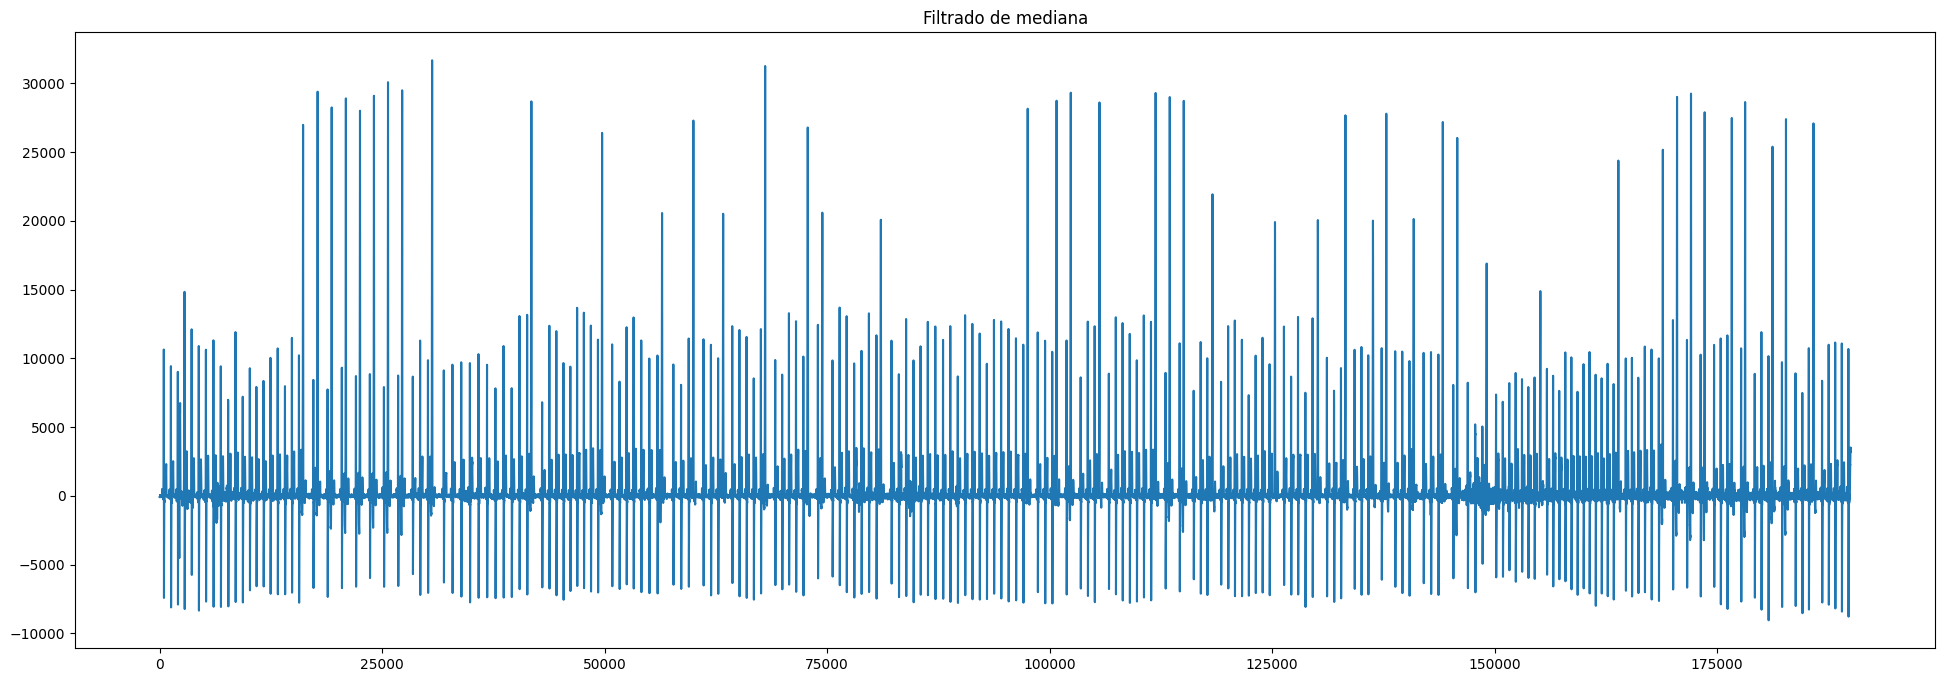

In [2]:
ecg_mediana = (ecg_muestra - sig.medfilt(ecg_muestra, 201))
plt.figure(figsize=(24, 8))
plt.plot(ecg_mediana)
plt.title("Filtrado de mediana")
plt.show()

### 2.3 Filtrado por interpolación

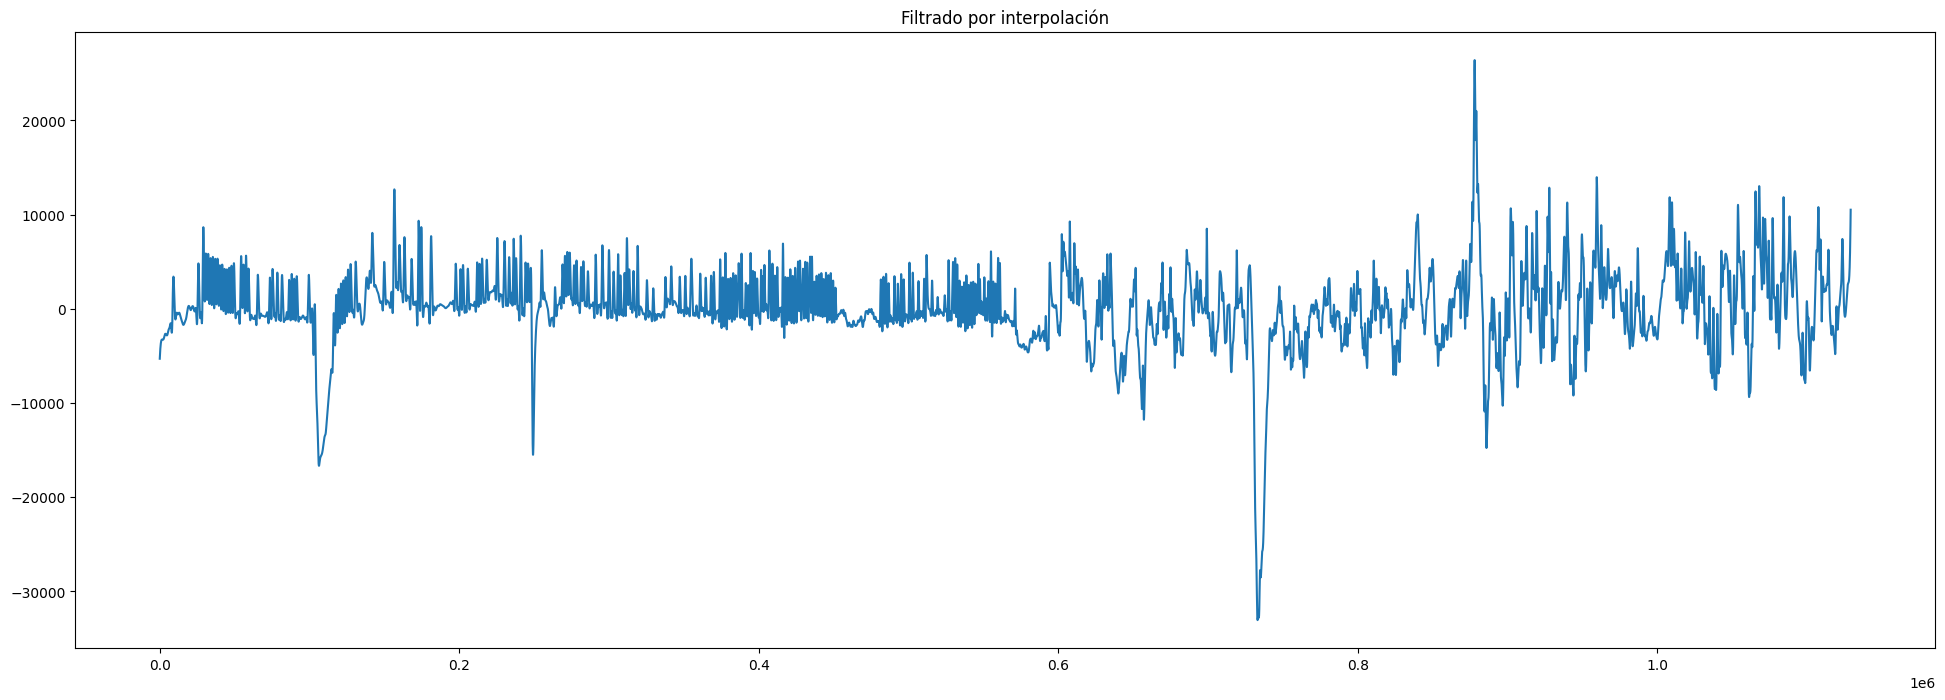

In [3]:
qrs_d = mat_struct["qrs_detections"]

x = []
y = []

for r in qrs_d:
    if r < 50:
        continue
    t = int(r - 50)
    x.append(t)
    y.append(ecg_one_lead[t])

# Asegurar que x_points y y_points estén ordenados
x, y = zip(*sorted(zip(x, y)))

spline = CubicSpline(x, y)
ecg_inter = ecg_one_lead - spline(np.arange(len(ecg_one_lead)))

plt.figure(figsize=(24,8))
plt.plot(spline(np.arange(len(ecg_inter))))
plt.title("Filtrado por interpolación")
plt.show()

### 2.4 Comparación

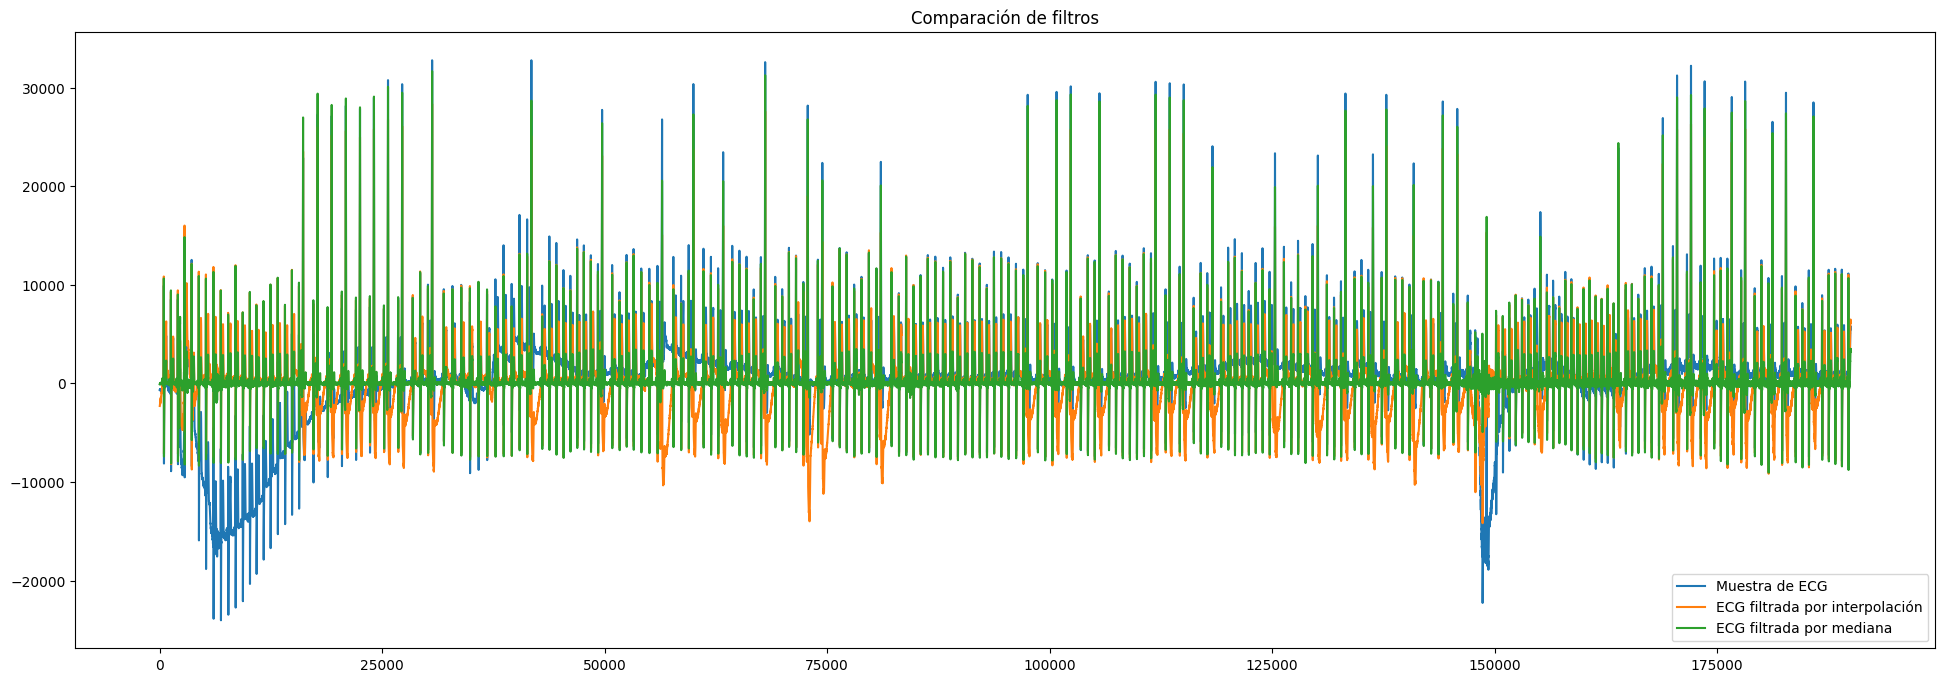

In [4]:
plt.figure(figsize=(24, 8))
plt.plot(ecg_muestra, label="Muestra de ECG")
plt.plot(ecg_inter[100000:290000], label="ECG filtrada por interpolación")
plt.plot(ecg_mediana, label="ECG filtrada por mediana")
plt.title("Comparación de filtros")
plt.legend()
plt.show()

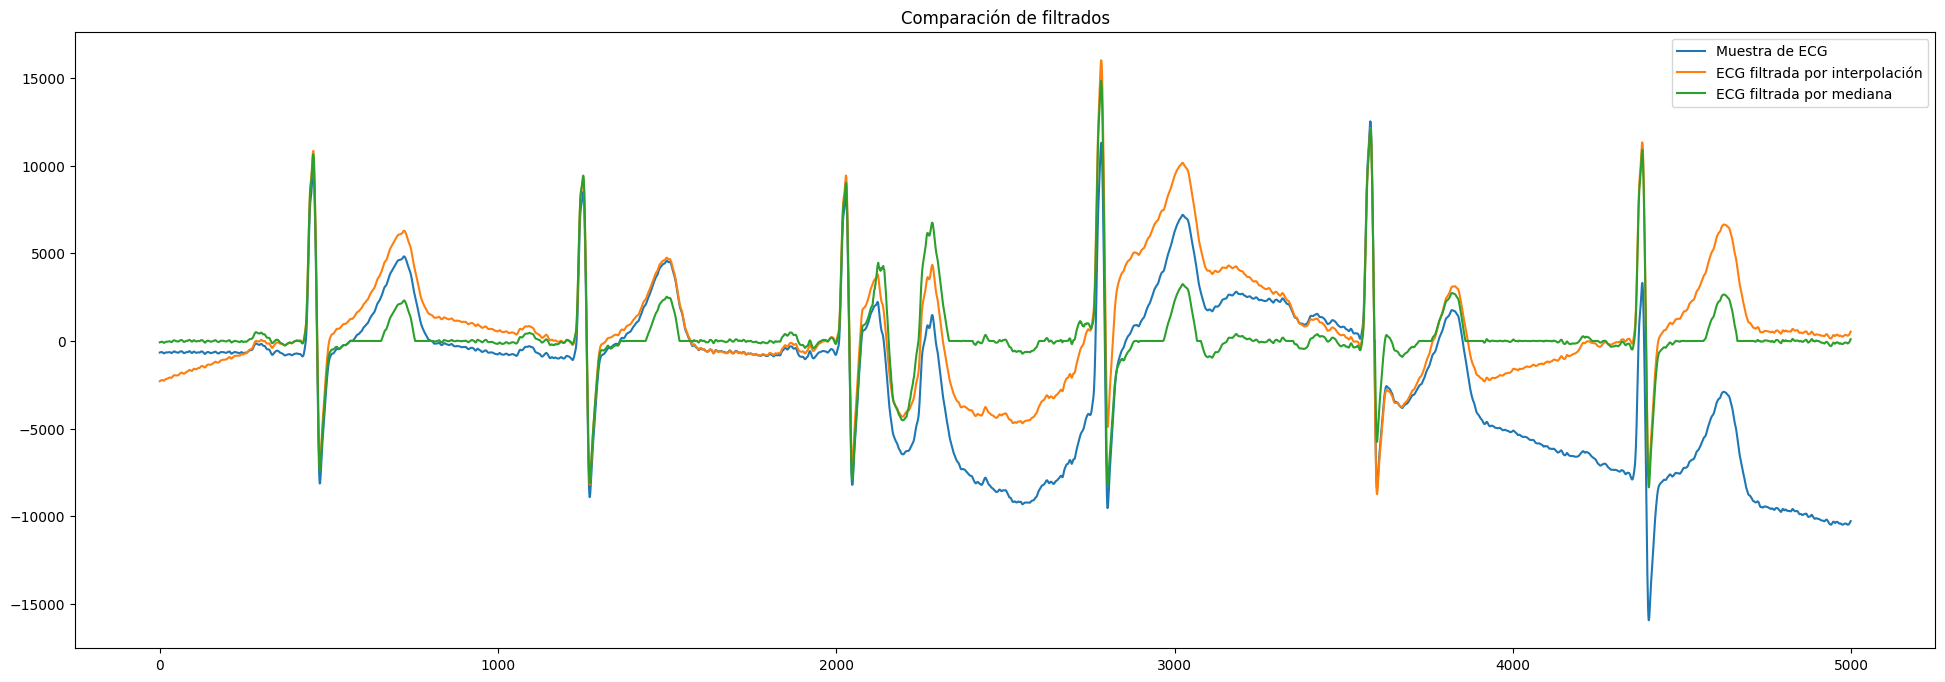

In [5]:
# Comparo una porción menor para apreciar mejor las diferencias

plt.figure(figsize=(24, 8))
plt.plot(ecg_muestra[0:5000], label="Muestra de ECG")
plt.plot(ecg_inter[100000:105000], label="ECG filtrada por interpolación")
plt.plot(ecg_mediana[0:5000], label="ECG filtrada por mediana")
plt.title("Comparación de filtrados")
plt.legend()
plt.show()

## 3. Conclusiones

Se logró cumplir con la consigna planteada en el TP mencionado. Se observó que ambos métodos de filtrado no lineal son útiles para remover la línea de base.

Sin embargo, ambos métodos poseen limitaciones debidas a su naturaleza.

El método de filtrado por mediana, por definición, otorga una señal extremadamente suavizada, lo que en señales biológicas puede representar una pérdida de información importante.

Por su lado, el método de interpolación cúbica puede introducir componentes en la señal que no se corresponden con la original.